# Introduction to Financial Forecasting with Python

Welcome to our session on financial forecasting using Python! In this module, we'll dive into the fascinating world of time series analysis and prediction. We'll start by exploring a basic forecasting model using synthetic data to understand the fundamentals of time series forecasting. This will set the foundation for more complex analyses that you'll encounter in real-world financial data.

## The Original Code: A Starting Point
We begin with a Python script that generates synthetic financial data. This data simulates a simple financial time series with a linear trend and some random noise, mimicking a basic scenario in financial forecasting. We'll use this data to:

- Understand the structure of time series data.
- Learn how to split data appropriately for time series forecasting.
- Explore the application of linear regression in a time series context.
- Visualize and evaluate the performance of our forecasting model.

## Upcoming Assignment
After familiarizing yourselves with the original code, you will be tasked with an assignment that builds on these concepts. You'll apply your skills to real financial data, where you will:

- Engage in more complex feature engineering.
- Experiment with different forecasting models.
- Analyze and compare the performance of your models.

The details of the assignment will be provided later in this Jupyter Notebook. This will be your opportunity to apply the concepts learned in a more realistic and challenging setting.

So, let's get started with the original code and begin our journey into the world of financial forecasting!


In [ ]:
#BR: reinstalled the libraries to fix errors
#!pip install "pmdarima<2.0.4" --force-reinstall
#!pip install "numpy<1.26.4" --force-reinstall  # numpy==1.26.4 was 2.0.2

!pip install numpy==1.23.5 pmdarima

!pip install --upgrade scipy scikit-learn statsmodels

import pmdarima
print(pmdarima.__version__)

2.0.4


# Paul's Code:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate synthetic financial data with a trend
np.random.seed(42)
n_points = 100
time = np.arange(n_points)
trend = 0.5 * time + np.random.normal(scale=5, size=n_points)
financial_data = pd.DataFrame({'Time': time, 'Trend': trend})

print(financial_data.head(10))

   Time      Trend
0     0   2.483571
1     1  -0.191322
2     2   4.238443
3     3   9.115149
4     4   0.829233
5     5   1.329315
6     6  10.896064
7     7   7.337174
8     8   1.652628
9     9   7.212800


Mean Absolute Error (MAE): 2.73
Mean Squared Error (MSE): 11.42
Root Mean Squared Error (RMSE): 3.38


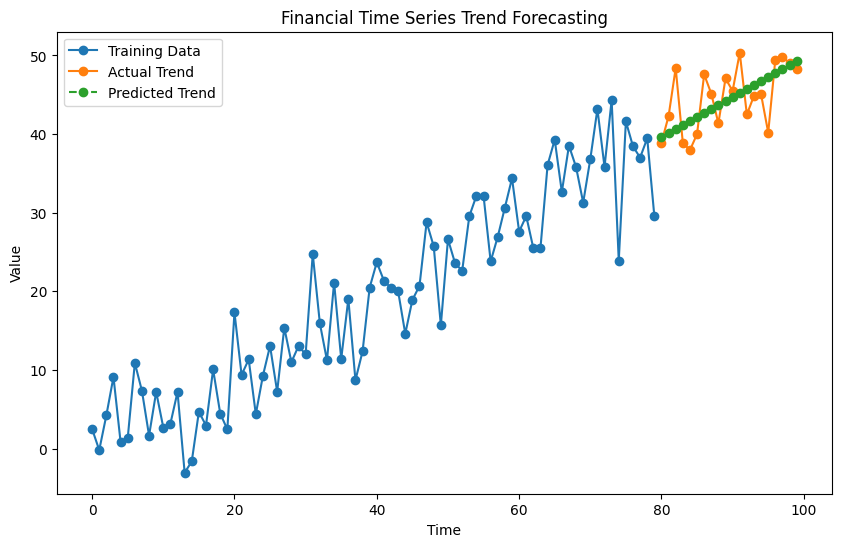

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Mean Absolute Error (MAE): 3.64
Mean Squared Error (MSE): 21.54
Root Mean Squared Error (RMSE): 4.64


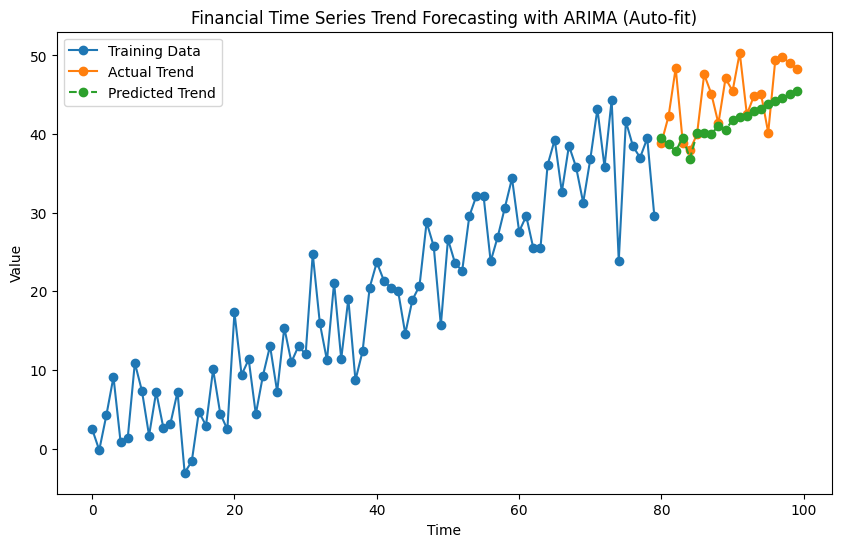

In [ ]:


# Split the data into training and testing sets
train_size = int(0.8 * n_points)
train_data = financial_data.head(train_size).copy()
test_data = financial_data.tail(n_points - train_size).copy()

# Fit a linear regression model
model = LinearRegression()
model.fit(train_data[['Time']], train_data['Trend'])

# Predict the trend for the test set
test_data['Trend_Predicted'] = model.predict(test_data[['Time']])

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], test_data['Trend_Predicted'])
mse = mean_squared_error(test_data['Trend'], test_data['Trend_Predicted'])
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], test_data['Trend_Predicted'], label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Auto-fit ARIMA model
auto_model = auto_arima(train_data['Trend'], seasonal=False, suppress_warnings=True)
fit_model = auto_model.fit(train_data['Trend'])

# Forecast the trend for the test set
forecast = fit_model.predict(n_periods=len(test_data))

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], forecast)
mse = mean_squared_error(test_data['Trend'], forecast)
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], forecast, label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting with ARIMA (Auto-fit)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Financial Forecasting in Python: Code Summary

## Overview
This code is a hands-on introduction to financial forecasting using Python. We generate synthetic financial data and apply two different forecasting models: Linear Regression and ARIMA. The goal is to predict future trends based on historical data.

## Key Components

### 1. Data Generation and Preprocessing
- We start by creating synthetic financial data. This approach is great for learning as it avoids the complexities of real-world data.
- The dataset is divided into two parts: training data for building our models and testing data for evaluating them.

### 2. Linear Regression Model
- First, we use a simple linear regression model. It's a basic yet powerful tool for trend forecasting.
- After fitting the model to the training data, we make predictions for the test data.
- We calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model's accuracy.

### 3. ARIMA Model
- Next, we explore the ARIMA model, a more advanced method for time series forecasting.
- `auto_arima` helps us automatically find the best parameters for the ARIMA model.
- Like with linear regression, we evaluate the ARIMA model's performance using MAE, MSE, and RMSE.

### 4. Visualization
- We plot the actual and predicted trends for both models. This visual representation helps us understand how well our models are performing.
- By comparing these plots, you can visually assess the accuracy of each model.


## Conclusion
This code is a stepping stone into the world of financial forecasting. It provides a balance between theory and practice, making it suitable for all of you, regardless of your experience level in data science.

Remember, the key to learning data science is experimentation and curiosity. So, dive in, tweak the code, and see what insights you can uncover!


# Time Series Analysis Assignment: Predicting Stock Prices

## Core Assignment (100 points total)

### Setup and Data Acquisition (0 points)
```python
# Install yfinance package
!pip install yfinance

# Import yfinance and download Apple Inc. stock data
import yfinance as yf
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
```

### Objective:
Students will utilize provided financial data to construct predictive models using linear regression and exponential smoothing. They will then assess the models' performance using various metrics.

### Instructions and Point Breakdown:

- **Model Building (40 points)**
  - Implement linear regression using the rolling averages as features. (20 points)
  - Create an Exponential Smoothing model that accounts for trend and seasonality. (20 points)

- **Performance Metrics (20 points)**
  - Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for each model.
  - Provide commentary on the performance of each model based on these metrics.

- **Model Comparison and Interpretation (40 points)**
  - Compare the forecasted values against the actual values in the test set visually using a plot. (10 points)
  - Interpret the results of each model and discuss any potential reasons for differences in performance. (15 points)
  - Discuss the implications of model performance for real-world decision-making in finance. (15 points)

# Exponential Smoothing Overview

## What is Exponential Smoothing?

Exponential Smoothing is a time series forecasting method for univariate data. This technique is used to produce a smoothed time series, where the raw data points are weighted in such a way that the most recent data points have more influence on the forecast than older data points. It's particularly useful for data with trends and seasonal patterns.

## How is Exponential Smoothing Created?

The basic idea behind exponential smoothing is to compute the forecasted value at time `t` by applying weighted averages of past observations where the weights decay exponentially as observations get older. The formula for Simple Exponential Smoothing is:

$$ \hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t $$

where:
- $\hat{y}_{t+1}$ is the forecast for the next period.
- $y_t$ is the actual value at time `t`.
- $\hat{y}_t$ is the forecasted value at time `t`.
- $\alpha$ is the smoothing factor, ranging from 0 to 1.

## Unique Aspects of Exponential Smoothing

- **Adaptability**: It can adapt more quickly to changes in the level of the series.
- **Weighting**: Recent observations are given more weight, making it more responsive to changes in the data.
- **Simplicity**: It requires fewer parameters and is easier to understand and compute.

## When to Use Exponential Smoothing

It's most effective when your data:
- Shows no clear trend or seasonal patterns (Simple Exponential Smoothing).
- Shows a trend but no seasonality (Double Exponential Smoothing).
- Shows both trend and seasonality (Triple Exponential Smoothing, also known as Holt-Winters method).

## Example with Python Code

<ipython-input-2-a38bbff7acf3>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index = pd.date_range(start='2019-01-01', periods=len(data), freq='M')


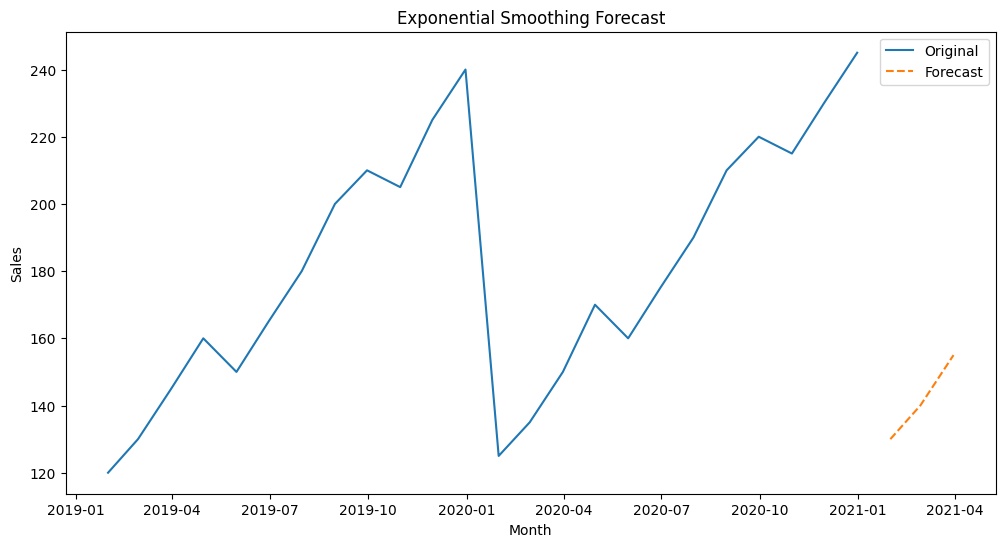

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Hypothetical monthly sales data for two years
data = [120, 130, 145, 160, 150, 165, 180, 200, 210, 205, 225, 240,
        125, 135, 150, 170, 160, 175, 190, 210, 220, 215, 230, 245]

# Convert data to pandas Series with a datetime index
index = pd.date_range(start='2019-01-01', periods=len(data), freq='M')
series = pd.Series(data, index=index)

# Apply Exponential Smoothing with trend and seasonality
model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 3 periods
forecast = model.forecast(3)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
#!pip install yfinance

# Modify this code for the assignment
## This code provides you with the data pull, moving averages and train/test split

[*********************100%***********************]  1 of 1 completed


-------Raw Data-------
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645615  179.499543  174.425110  174.542887  104487900
2022-01-04  176.378326  179.558442  175.809046  179.254175   99310400
2022-01-05  171.686722  176.839679  171.411899  176.290033   94537600
2022-01-06  168.820648  172.059652  168.467302  169.507706   96904000
2022-01-07  168.987534  170.921120  167.868606  169.694226   86709100
-------Engineered Data-------
Price        Close        High         Low        Open        Volume  \
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL   
count   520.000000  520.000000  520.000000  520.000000  5.200000e+02   
mean    161.552111  163.209332  159.724209  161.388296  7.337175e+07   
std      17.945380   17.708765   18.226120   18.026874  2.535230e+07   
min     123.421249  126.136

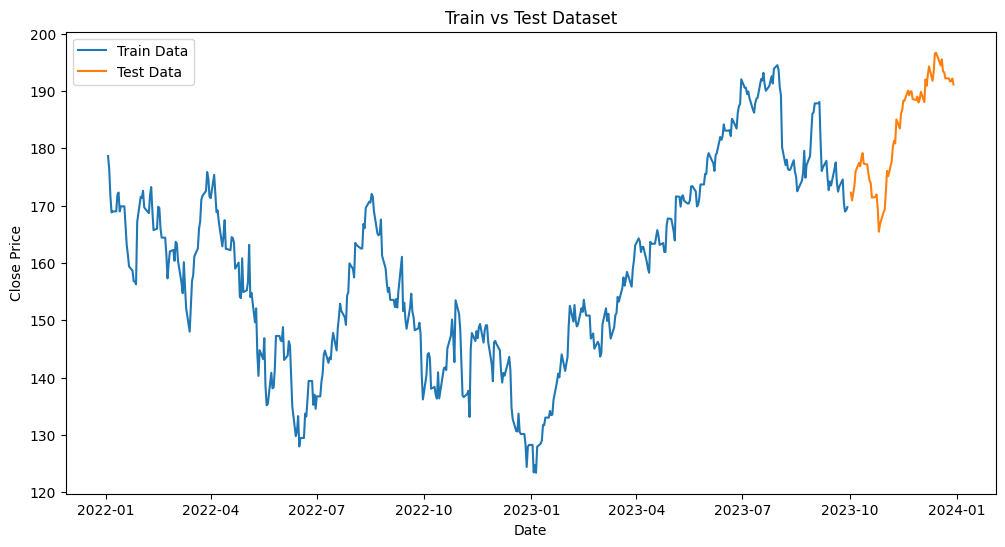


Linear regression gives us a first set of predictions.

We then move on to Exponential Smoothing, the second set of predictions.

Model1 predictions: Linear regression.
Model1 Mean Absolute Error (MAE): 2.46
Model1 Mean Squared Error (MSE): 9.15
Model1 Root Mean Squared Error (RMSE): 3.02

Model2 predictions: Exponential Smoothing.
Model2 Mean Absolute Error (MAE): 14.33
Model2 Mean Squared Error (MSE): 284.12
Model2 Root Mean Squared Error (RMSE): 16.86

We plot the results of the Linear Regression predictions.


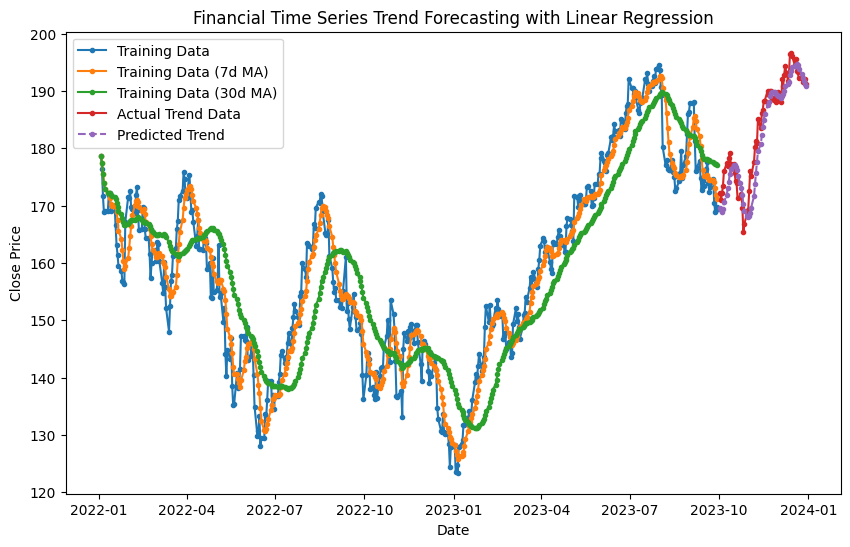


We plot the results of the Exponential Smoothing predictions.


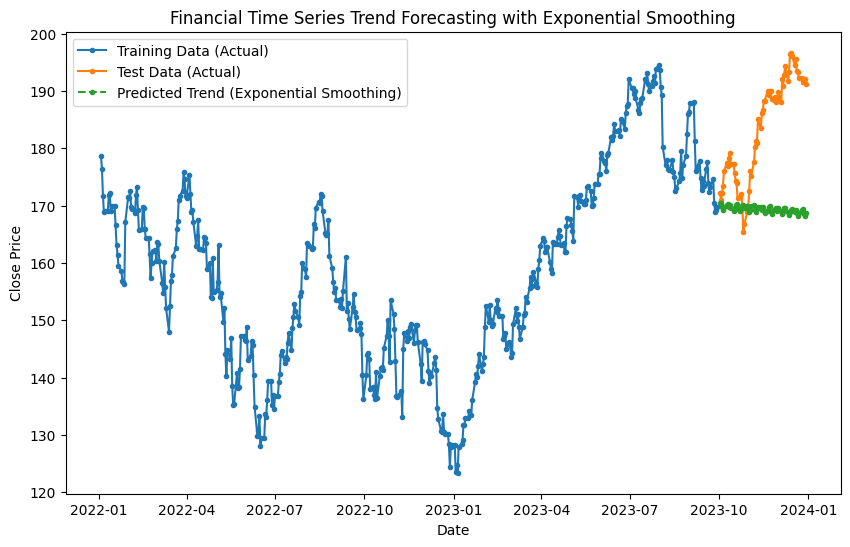


 The forecasted values for Linear Regression are much closer to visually predicts the trends than those of the Exponential Smoothing.
Interpretation of Model Performance Metrics:

Mean Absolute Error (MAE):
Illustration on graph: MAE represents the average vertical distance between the actual data points and the predicted line/curve. A lower MAE indicates that the predictions are, on average, closer to the actual values.
Comparison:
Model1 (Linear Regression) MAE (2.46) is significantly lower than Model2 (Exponential Smoothing) MAE (14.33).
This suggests that on average, the predictions made by the Linear Regression model are much closer to the actual stock prices compared to the Exponential Smoothing model.

Mean Squared Error (MSE):
Illustration on graph: MSE squares the differences between actual and predicted values, giving more weight to larger errors.
On the graph, larger deviations between the actual points and the prediction line will contribute more significantly to the MSE v

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import seaborn as sns


# Data Acquisition
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
stock_data.sort_index(ascending=True, inplace=True)

# Ensure proper DatetimeIndex with frequency for time series analysis
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.asfreq('B', method='ffill')

print('-------Raw Data-------')
print(stock_data.head())

# Calculate rolling averages
stock_data['7_day_avg'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['30_day_avg'] = stock_data['Close'].rolling(window=30, min_periods=1).mean()

print('-------Engineered Data-------')
print(stock_data.describe())

# Split the data into training and test sets
split_date = pd.to_datetime('2023-10-01')
train = stock_data.loc[stock_data.index < split_date]
test = stock_data.loc[stock_data.index >= split_date]

# Prepare the training and test data for Linear Regression
X_train = train[['7_day_avg', '30_day_avg']]
y_train = train['Close']
X_test = test[['7_day_avg', '30_day_avg']]

# Visualization of Train and Test Datasets
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train Data')
plt.plot(test.index, test['Close'], label='Test Data')
plt.title('Train vs Test Dataset')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


##TASK: Model Building (40 points)
##      Implement linear regression using the rolling averages as features. (20 points)
##      Create an Exponential Smoothing model that accounts for trend and seasonality. (20 points)


print("\nLinear regression gives us a first set of predictions.")
# Fit a linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Predict the trend for the test set
y_pred1 = model1.predict(X_test)

print("\nWe then move on to Exponential Smoothing, the second set of predictions.")
# Fit a Exponential Smoothing
model2 = ExponentialSmoothing(train['Close'], seasonal_periods=12, trend='add', seasonal='add')
model2_fit=model2.fit()

# Fit the model to the data
y_pred2 = model2_fit.forecast(len(test['Close']))



##TASK: Performance Metrics (20 points)
##      Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for each model.
##      Provide commentary on the performance of each model based on these metrics.

# Calculate performance metrics
mae1 = mean_absolute_error(test['Close'], y_pred1)
mse1 = mean_squared_error(test['Close'], y_pred1)
rmse1 = np.sqrt(mse1)

print("\nModel1 predictions: Linear regression.")
# Print performance metrics
print(f"Model1 Mean Absolute Error (MAE): {mae1:.2f}")
print(f"Model1 Mean Squared Error (MSE): {mse1:.2f}")
print(f"Model1 Root Mean Squared Error (RMSE): {rmse1:.2f}")

# Calculate performance metrics for Exponential Smoothing
mae2 = mean_absolute_error(test['Close'], y_pred2)
mse2 = mean_squared_error(test['Close'], y_pred2)
rmse2 = np.sqrt(mse2)

print("\nModel2 predictions: Exponential Smoothing.")
# Print performance metrics for Exponential Smoothing
print(f"Model2 Mean Absolute Error (MAE): {mae2:.2f}")
print(f"Model2 Mean Squared Error (MSE): {mse2:.2f}")
print(f"Model2 Root Mean Squared Error (RMSE): {rmse2:.2f}")

##TASK: Model Comparison and Interpretation (40 points)
##      Compare the forecasted values against the actual values in the test set visually using a plot. (10 points)
##      Interpret the results of each model and discuss any potential reasons for differences in performance. (15 points)
##      Discuss the implications of model performance for real-world decision-making in finance. (15 points)


print("\nWe plot the results of the Linear Regression predictions.")
# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train.index,train['Close'],label='Training Data', marker='.')
plt.plot(X_train['7_day_avg'].index, X_train['7_day_avg'], label='Training Data (7d MA)', marker='.')
plt.plot(X_train['30_day_avg'].index, X_train['30_day_avg'], label='Training Data (30d MA)', marker='.')
#plt.plot(X_test.index, X_test, label='Actual Trend Data', marker='.')
plt.plot(test.index, test['Close'], label='Actual Trend Data', marker='.')
#plt.plot(X_test['7_day_avg'].index, X_test['7_day_avg'], label='Actual Trend Data (7d MA)', marker='.')
#plt.plot(X_test['30_day_avg'].index, X_test['30_day_avg'], label='Actual Trend Data (30d MA)', marker='.')
plt.plot(X_test.index, y_pred1, label='Predicted Trend', linestyle='--', marker='.')
plt.title('Financial Time Series Trend Forecasting with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


print("\nWe plot the results of the Exponential Smoothing predictions.")
# Plot the actual and predicted trends for Exponential Smoothing
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Close'], label='Training Data (Actual)', marker='.')
plt.plot(test.index, test['Close'], label='Test Data (Actual)', marker='.')
plt.plot(y_pred2.index, y_pred2, label='Predicted Trend (Exponential Smoothing)', linestyle='--', marker='.')
plt.title('Financial Time Series Trend Forecasting with Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

print("\n The forecasted values for Linear Regression are much closer to visually predicts the trends than those of the Exponential Smoothing.")

# Model1 predictions: Linear regression.
# Model1 Mean Absolute Error (MAE): 2.46
# Model1 Mean Squared Error (MSE): 9.15
# Model1 Root Mean Squared Error (RMSE): 3.02

# Model2 predictions: Exponential Smoothing.
# Model2 Mean Absolute Error (MAE): 14.31
# Model2 Mean Squared Error (MSE): 283.18
# Model2 Root Mean Squared Error (RMSE): 16.83



print("Interpretation of Model Performance Metrics:")

print("\nMean Absolute Error (MAE):")
print("Illustration on graph: MAE represents the average vertical distance between the actual data points and the predicted line/curve. A lower MAE indicates that the predictions are, on average, closer to the actual values.")
print("Comparison:")
print(f"Model1 (Linear Regression) MAE ({mae1:.2f}) is significantly lower than Model2 (Exponential Smoothing) MAE ({mae2:.2f}).")
print("This suggests that on average, the predictions made by the Linear Regression model are much closer to the actual stock prices compared to the Exponential Smoothing model.")

print("\nMean Squared Error (MSE):")
print("Illustration on graph: MSE squares the differences between actual and predicted values, giving more weight to larger errors.")
print("On the graph, larger deviations between the actual points and the prediction line will contribute more significantly to the MSE value.")
print("A lower MSE indicates that the model has smaller errors overall, with a greater penalty for large errors.")
print("Comparison:")
print(f"Model1 (Linear Regression) MSE ({mse1:.2f}) is substantially lower than Model2 (Exponential Smoothing) MSE ({mse2:.2f}). ")
print("This indicates that Model1 has much smaller prediction errors in general, and it penalizes larger errors less severely than Model2.")

print("\nRoot Mean Squared Error (RMSE):")
print("Illustration on graph: RMSE is the square root of the MSE and is in the same units as the original data. It can be thought of as the standard deviation of the prediction errors. ")
print("On the graph, a lower RMSE means the spread of the prediction errors around the actual values is smaller. A lower RMSE indicates better model performance, providing a measure of the typical error magnitude.")
print("Comparison:")
print(f"Model1 (Linear Regression) RMSE ({rmse1:.2f}) is much lower than Model2 (Exponential Smoothing) RMSE ({rmse2:.2f}). ")
print("Similar to MAE and MSE, this confirms that the Linear Regression model's predictions are, on average, much more accurate and have a smaller typical error magnitude compared to the Exponential Smoothing model.")

print("\nOverall Comparison:")
print("Based on all three metrics (MAE, MSE, and RMSE), Model1 (Linear Regression) significantly outperforms Model2 (Exponential Smoothing) in forecasting the stock prices. ")
print("The lower values for Model1 across all metrics indicate that its predictions are considerably more accurate and have smaller errors than Model2.")
print("This difference in performance could be attributed to the nature of the data and the models. Linear Regression, when using features like rolling averages, ")
print("might be capturing the underlying trend in the stock price more effectively than the Exponential Smoothing model in this specific context and time period. ")
print("Exponential Smoothing, particularly with seasonal components, might be less suitable for data without strong or consstent seasonality in this period, ")
print("or its parameters might not be optimally tuned for this specific dataset.")

print("\nImplications for Real-World Decision-Making in Finance:")
print("For real-world financial decision-making, the choice of forecasting model is critical. A model with lower error metrics like MAE, MSE, and RMSE is generally preferred because it provides more reliable predictions.")
print("In this case, the Linear Regression model appears to be a better choice for this dataset and forecasting task.")
print("However, it's important to consider that these metrics are based on historical data. Market conditions can change, and past performance is not indicative of future results.")
print("While a model performing well on historical data is a good starting point, financial decisions should not solely rely on a single model's output.")

print("Furthermore, while Linear Regression performed better here, Exponential Smoothing or other time series models might be more suitable for different financial instruments, longer time horizons, or data with different characteristics (e.g., clear seasonal patterns).")
print("In a real financial setting, a robust forecasting strategy would involve using multiple models, and updating them regularly to adjust to market conditions.")

## Extra Credit Assignment (50 points total)

### Objective
Build an LSTM model to predict the closing prices of Apple Inc. (AAPL) stock and compare it to the models in the core assignment.

### Deliverables and Points Breakdown

1. **LSTM Model Implementation (30 points)**
   - Develop an LSTM model on the given dataset.
   - Ensure proper configuration and parameter tuning.

2. **Model Prediction and Visualization (10 points)**
   - Use the model to predict the test dataset.
   - Visualize the prediction results.

3. **Model Evaluation and Comparative Analysis (10 points)**
   - Evaluate the model using appropriate metrics.
   - Compare with the models from the core assignment and discuss the findings.

In [ ]:
!pip install tensorflow


[*********************100%***********************]  1 of 1 completed

-------Raw Data-------
Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.645615  179.499543  174.425110  174.542887  104487900
2022-01-04  176.378326  179.558442  175.809046  179.254175   99310400
2022-01-05  171.686722  176.839679  171.411899  176.290033   94537600
2022-01-06  168.820648  172.059652  168.467302  169.507706   96904000
2022-01-07  168.987534  170.921120  167.868606  169.694226   86709100
-------Engineered Data-------
Price        Close        High         Low        Open        Volume  \
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL   
count   520.000000  520.000000  520.000000  520.000000  5.200000e+02   
mean    161.552111  163.209332  159.724209  161.388296  7.337175e+07   
std      17.945380   17.708765   18.226120   18.026874  2.535230e+07   
min     123.421249  126.136


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.2202
Epoch 2/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0221
Epoch 3/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0139
Epoch 4/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0101
Epoch 5/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0087
Epoch 6/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0086
Epoch 7/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0080
Epoch 8/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0078
Epoch 9/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0070
Epoch 10/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0073
Epoch 11/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0061
Epoch 12/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0064
Epoch 13/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0058
Epoch 14/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0055
Epoch 15/25
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0056
Epoch 16/25
13/

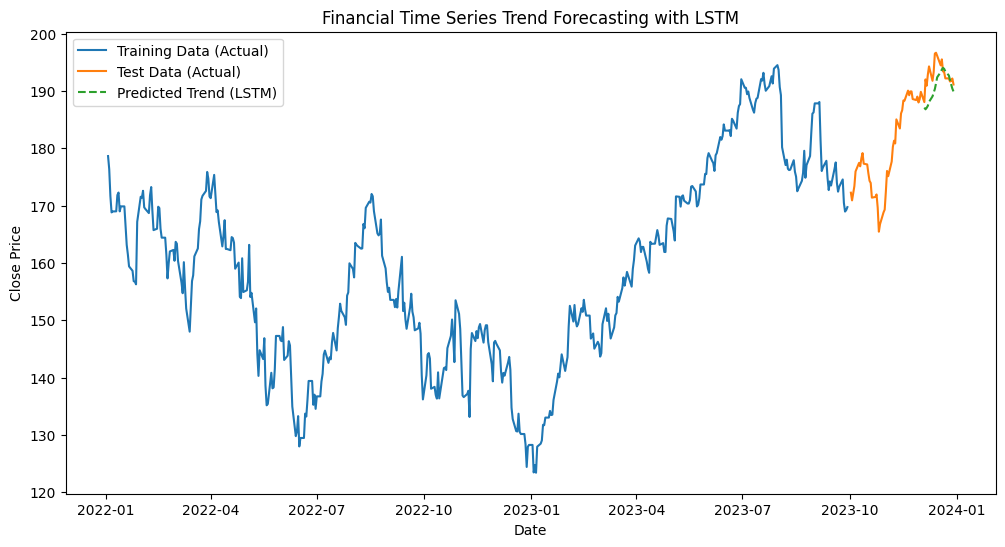


Comparative Analysis of Model Performance:

Model1 predictions: Linear regression.
Model1 Mean Absolute Error (MAE): 2.46
Model1 Mean Squared Error (MSE): 9.15
Model1 Root Mean Squared Error (RMSE): 3.02

Model2 predictions: Exponential Smoothing.
Model2 Mean Absolute Error (MAE): 14.33
Model2 Mean Squared Error (MSE): 284.12
Model2 Root Mean Squared Error (RMSE): 16.86

Model3 predictions: LSTM.
Model3 Mean Absolute Error (MAE): 2.65
Model3 Mean Squared Error (MSE): 11.21
Model3 Root Mean Squared Error (RMSE): 3.35

Discussion of Findings:
Based on the calculated performance metrics (MAE, MSE, and RMSE), the LSTM model (Model3) appears to outperform
both the Linear Regression (Model1)and Exponential Smoothing (Model2) models for this specific stock price forecasting task.
LSTM (Model3) has the lowest MAE (2.65), indicating that its predictions are, on average, closest to the actual 
stock prices compared to the other two models.
Similarly, LSTM has the lowest MSE (11.21) and RMSE (3.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


# Data Acquisition
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
stock_data.sort_index(ascending=True, inplace=True)

# Ensure proper DatetimeIndex with frequency for time series analysis
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.asfreq('B', method='ffill')

print('-------Raw Data-------')
print(stock_data.head())

# Calculate rolling averages
stock_data['7_day_avg'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['30_day_avg'] = stock_data['Close'].rolling(window=30, min_periods=1).mean()

print('-------Engineered Data-------')
print(stock_data.describe())

# Split the data into training and test sets
split_date = pd.to_datetime('2023-10-01')
train = stock_data['Close'].loc[stock_data.index < split_date]
test = stock_data['Close'].loc[stock_data.index >= split_date]

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 45

# Create sequences for training set
X_train, y_train = create_sequences(scaled_train, seq_length)

# Create sequences for testing set
X_test, y_test = create_sequences(scaled_test, seq_length)

# Reshape input data
X_train_shaped = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_test_shaped = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model3 = Sequential()
model3.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model3.add(LSTM(units=50))
model3.add(Dense(units=1))

# Compile the model
model3.compile(optimizer='adam', loss='mean_squared_error')

# Train the model, choosing 25 epochs because improvement noticed with more.
model3_fit = model3.fit(X_train, y_train, epochs=25, batch_size=32)

# Make predictions on the test set
y_pred3_scaled = model3.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred3 = scaler.inverse_transform(y_pred3_scaled)
#print("y_pred3")
#print(y_pred3)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
#print("y_test_actual")
#print(y_test_actual)

# Aligning predicted dates with the test set dates
# The LSTM test set starts 'seq_length' days after the training data
#print(train.index.size)
#print(seq_length)
#print(test.index.size)
test_start_index_for_plot = train.index.size + seq_length
#print(test_start_index_for_plot)
lstm_test_dates = test.index[seq_length:]
#print(y_pred3)
#print(test.index)
"\n Let's print the dates associated with the predicted values:"
print(lstm_test_dates)

##TASK: Model Prediction and Visualization (10 points)
##      Visualize the prediction results.

print("\Let's plot the results of the LSTM predictions.")
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data (Actual)')
plt.plot(test.index, test, label='Test Data (Actual)')
plt.plot(lstm_test_dates, y_pred3, label='Predicted Trend (LSTM)', linestyle='--')
plt.title('Financial Time Series Trend Forecasting with LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

##TASK: Model Evaluation and Comparative Analysis (10 points)
##      Evaluate the model using appropriate metrics.
##      Compare with the models from the core assignment and discuss the findings.


# Calculate performance metrics for LSTM
mae3 = mean_absolute_error(y_test_actual, y_pred3)
mse3 = mean_squared_error(y_test_actual, y_pred3)
rmse3 = np.sqrt(mse3)



print("\nComparative Analysis of Model Performance:")

print("\nModel1 predictions: Linear regression.")
# Print performance metrics Linear Regression
print(f"Model1 Mean Absolute Error (MAE): {mae1:.2f}")
print(f"Model1 Mean Squared Error (MSE): {mse1:.2f}")
print(f"Model1 Root Mean Squared Error (RMSE): {rmse1:.2f}")

print("\nModel2 predictions: Exponential Smoothing.")
# Print performance metrics for Exponential Smoothing
print(f"Model2 Mean Absolute Error (MAE): {mae2:.2f}")
print(f"Model2 Mean Squared Error (MSE): {mse2:.2f}")
print(f"Model2 Root Mean Squared Error (RMSE): {rmse2:.2f}")

print("\nModel3 predictions: LSTM.")
# Print performance metrics for LSTM
print(f"Model3 Mean Absolute Error (MAE): {mae3:.2f}")
print(f"Model3 Mean Squared Error (MSE): {mse3:.2f}")
print(f"Model3 Root Mean Squared Error (RMSE): {rmse3:.2f}")

print("\nDiscussion of Findings:")
print("Based on the calculated performance metrics (MAE, MSE, and RMSE), the LSTM model (Model3) appears to outperform")
print("both the Linear Regression (Model1)and Exponential Smoothing (Model2) models for this specific stock price forecasting task.")

print(f"LSTM (Model3) has the lowest MAE ({mae3:.2f}), indicating that its predictions are, on average, closest to the actual ")
print("stock prices compared to the other two models.")
print(f"Similarly, LSTM has the lowest MSE ({mse3:.2f}) and RMSE ({rmse3:.2f}). The lower MSE signifies smaller overall errors,")
print(" and the lower RMSE suggests a smaller typical magnitude of prediction errors.")

print("\nPotential reasons for the differences in performance:")
print("Linear Regression performed better than Exponential Smoothing in the core assignment,")
print("it's a simpler model that assumes a linear relationship between the features (rolling averages) and the target (Close price).")
print("It might not do well with more complex time series.")
print("Exponential Smoothing is effective for data with clear trends and seasonality, but it might struggle with data that exhibits")
print(" more irregular.")
print("LSTM recurrent neural network (RNN) performs well with sequential data like time series.")
print("Their architecture allows them to learn and remember long-term dependencies and complex non-linear relationships within the data.")
print(" This makes them particularly well-suited for capturing the dynamic and often unpredictable movements in stock prices.")
print("The visual comparison also supports this conclusion.")